We need to match the template ‘template.jpg’ in ‘image2.jpg’ and highlight the corresponding region. 

To perform this task, first compute the Local Binary Pattern and the corresponding histogram of the same for ‘template.jpg’ [resize the image to 60x60].

Now, divide ‘image2.jpg’ into non-overlapping regions of 60x60 and compute the LBP histogram for all the regions.

Compute the similarity between each region and the given template using the Manhattan distance (of the LBP histogram).

Highlight the region with minimal distance in the original image.

Optional: For more accurate matching, try to divide the original image into overlapping regions of 60x60 (with stride of 30 or some other value).


In [0]:
%pylab inline --no-import-all

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [0]:
def isValid(x, y, r, c):
    if(x>=0 and x<r and y>=0 and y<c):
        return 1
    else:
        return 0

In [0]:
def compute_lbp(img):
    r, c = img.shape
    new_img = np.zeros(img.shape, dtype = "uint8")
    
    for i in range(r):
        for j in range(c):
            
            binary = ""
            
            for p, q in [(i, j-1), (i+1, j-1), (i+1, j), (i+1, j+1), (i, j+1), (i-1, j+1), (i-1, j), (i-1, j-1)]:
                
                if(isValid(p, q, r, c)):
                    
                    if(img[p, q] >= img[i, j]):
                        binary = "1" + binary
                    else:
                        binary = "0" + binary
                else:
                    binary = "0" + binary
                    
            new_img[i][j] = int(binary, 2)
                        
    return new_img

In [0]:
def calculate_histogram(img):
    hist = []

    for i in range(256):
        hist.append(0)

    for i in range(len(img)):
        for j in range(len(img[i])):
            hist[img[i][j]] += 1
    
    total = sum(hist)
    
    return hist


def manhattan_distance(h1, h2):
    distance = 0
    
    for i in range(len(h1)):
        distance += abs(h1[i] - h2[i])
        
    return distance

Input image shape : (240, 320)


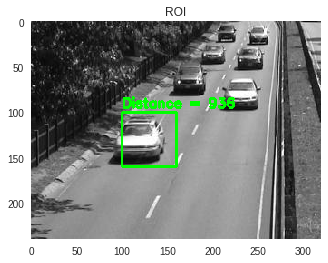

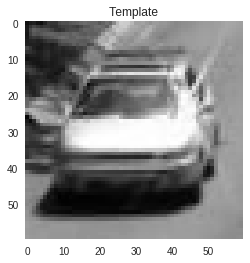

In [0]:
template = cv2.imread('template.jpg')
gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.resize(gray, (60, 60))

template_lbp = compute_lbp(template)
template_hist = calculate_histogram(template_lbp)

orig_img = cv2.imread('image2.jpg')
img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)

r, c = img.shape

print("Input image shape :", img.shape)

similarity = []

for i in range(0, r-40, 20):
    for j in range(0, c-40, 20):
        
        img_slice = img[i:i+60, j:j+60]
        
        img_slice_lbp = compute_lbp(img_slice)
        
        img_slice_hist = calculate_histogram(img_slice_lbp)
        
        d = manhattan_distance(template_hist, img_slice_hist)
        
        similarity.append((d, (i, j)))


min_dist = r * c
roi = ()

for i in range(len(similarity)):
    if(similarity[i][0] < min_dist):
        min_dist = similarity[i][0]
        roi = similarity[i][1]
        
cv2.rectangle(orig_img, (roi[0], roi[1]), (roi[0] + 60, roi[1] + 60), (0, 255, 0), 2)

cv2.putText(orig_img, "Distance = " + str(min_dist), (roi[0], roi[1] - 5), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
plt.grid(False)
plt.title("ROI")
plt.imshow(orig_img, cmap = "gray")
plt.show()

plt.grid(False)
plt.title("Template")
plt.imshow(template, cmap = "gray")